# Drug Review

## Used libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Upload data

In [2]:
path_train = 'data/drugsComTrain_raw.csv'
path_test = 'data/drugsComTest_raw.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [4]:
df_all = pd.concat([df_train, df_test], ignore_index=True)
df_all.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
print(f'Train set shape: {df_train.shape}')
print(f'Test set shape: {df_test.shape}')
print(f'Full set shape: {df_all.shape}')

Train set shape: (161297, 7)
Test set shape: (53766, 7)
Full set shape: (215063, 7)


## Data Preprocessing

### Remove reviews with missing values

In [6]:
df_all.isna().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

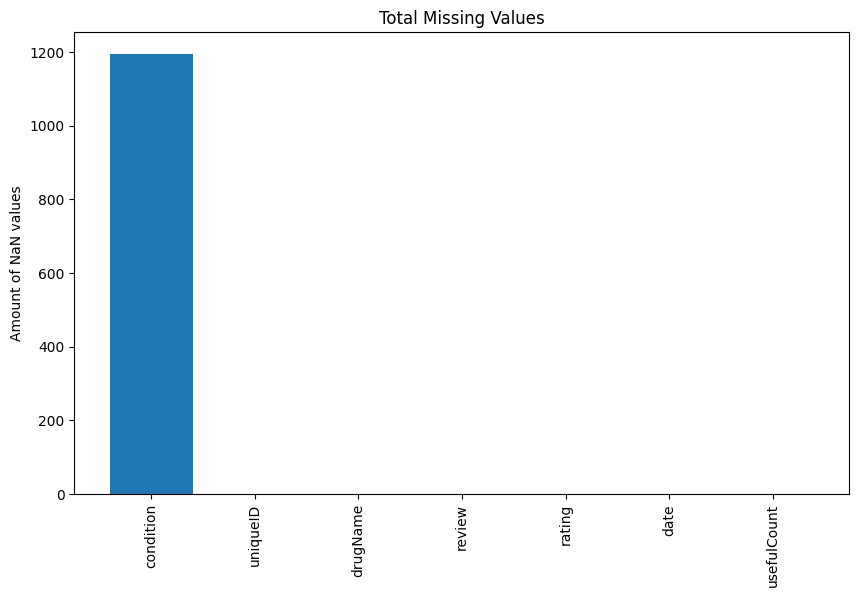

In [7]:
nan_percentage = df_all.isna().sum().sort_values(ascending=False)

#plot number of NaN values in each feature
plt.figure(figsize=(10,6))
plt.bar(nan_percentage.index, height=nan_percentage)
plt.xticks(fontsize=10, rotation=90)
plt.ylabel('Amount of NaN values')
plt.title('Total Missing Values')
plt.show()

In [8]:
#create mask to see rows with NaN values
mask = df_all.isna()
df_na = df_all[mask.any(axis=1)]
df_na

,uniqueID,drugName,condition,review,rating,date,usefulCount
30,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10,18-Aug-10,1
148,61073,Urea,NaN,"""Accurate information.""",10,2-Jul-11,13
488,132651,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10,20-Oct-10,25
733,44297,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8,24-Jan-11,1
851,68697,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6,23-Mar-17,1
...,...,...,...,...,...,...,...
213721,170508,Quetiapine,NaN,"""good for insomnia most of the time""",7,27-May-15,10
213785,104629,Ethinyl estradiol / levonorgestrel,NaN,"""I am almost on my third month of my first pac...",5,25-Apr-11,4
213914,104642,Ethinyl estradiol / levonorgestrel,NaN,"""I have been taking this birth control for two...",10,11-Jan-11,1
214039,720,Medroxyprogesterone,NaN,"""I have been using the shot for 7 years now an...",10,21-Apr-11,1


There's no point in having those rows with no condition. Let's drop them

In [9]:
print(f'Initial number of rows in the full set: {len(df_all)}')
print(f'Initial number of rows in the train set: {len(df_train)}')
print(f'Initial number of rows in the test set: {len(df_test)}')

df_all.dropna(inplace=True)
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

print(f'Number of rows in full set after dropping NaN values: {len(df_all)}')
print(f'Number of rows in train set after dropping NaN values: {len(df_train)}')
print(f'Number of rows in test set after dropping NaN values: {len(df_test)}')

Initial number of rows in the full set: 215063
Initial number of rows in the train set: 161297
Initial number of rows in the test set: 53766
Number of rows in full set after dropping NaN values: 213869
Number of rows in train set after dropping NaN values: 160398
Number of rows in test set after dropping NaN values: 53471


In [10]:
#number of unique conditions
cond_nunique = df_all['condition'].nunique()

#number of unique drug names
drug_nunique = df_all['drugName'].nunique()

print(f'There are {drug_nunique} unique values of drugs')
print(f'There are {cond_nunique} unique values of conditions')
print(f'There are {int(drug_nunique/cond_nunique)} drugs for each condition')

There are 3667 unique values of drugs
There are 916 unique values of conditions
There are 4 drugs for each condition


### Remove reviews with '<\span>' in the condition

<function matplotlib.pyplot.show(close=None, block=None)>

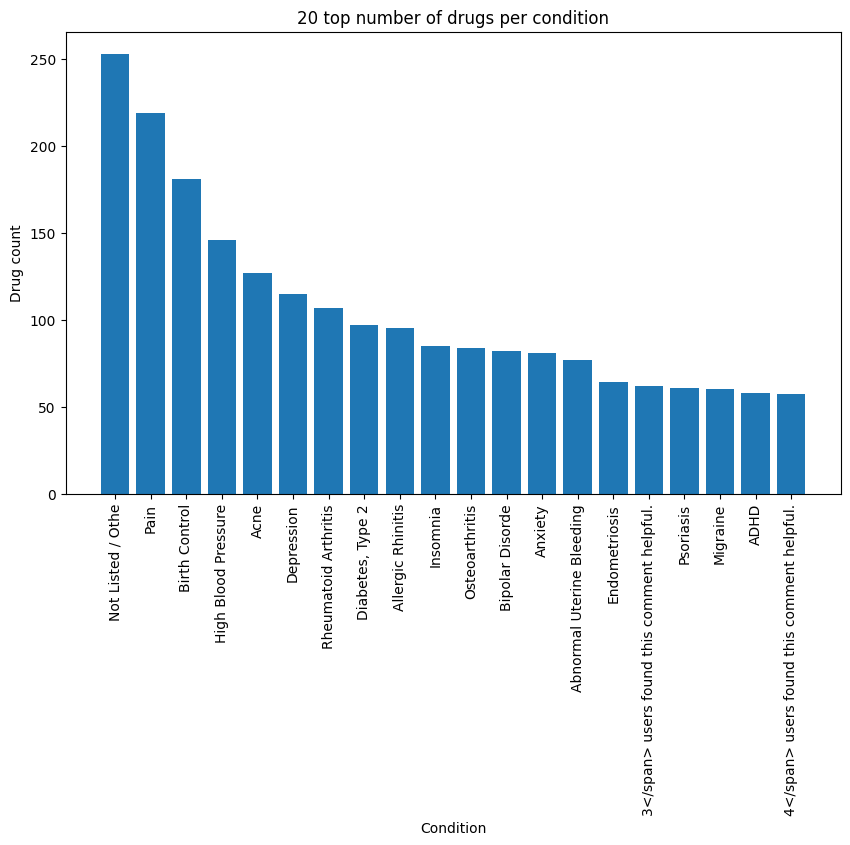

In [11]:
#drugs grouped by condition
drug_by_cond = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False).head(20)

#plot amount of drugs for each condition
plt.figure(figsize=(10,6))
plt.bar(drug_by_cond.index, drug_by_cond)
plt.xlabel('Condition')
plt.ylabel('Drug count')
plt.xticks(fontsize=10, rotation=90)
plt.title('20 top number of drugs per condition')
plt.show

In [12]:
df_all[df_all['condition'].str.contains('users.*helpful')]

,uniqueID,drugName,condition,review,rating,date,usefulCount
105,220696,Loestrin 24 Fe,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f...",3,3-Nov-10,2
196,67383,Provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1,27-Mar-16,4
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3,1-Jun-10,3
264,132965,Loestrin 24 Fe,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con...",2,24-Jun-14,4
391,91050,Norco,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger...",9,15-Mar-09,11
...,...,...,...,...,...,...,...
213740,133354,Tri-Sprintec,3</span> users found this comment helpful.,"""I have been taking this pill for less than a ...",8,24-Sep-10,3
214413,149494,Mirena,5</span> users found this comment helpful.,"""I got the Mirena put in last month. And holy ...",7,12-Feb-13,5
214584,91988,Lyrica,21</span> users found this comment helpful.,"""It was a nightmare.I had the worse side effec...",1,14-Apr-15,21
214650,174757,Dulera,28</span> users found this comment helpful.,"""My 10 year old son took Dulera for asthma. I...",1,29-Feb-12,28


In [13]:
#create mask to drop rows with condition = 'users found... helpful.'
mask_all = df_all['condition'].str.contains('users.*helpful')
mask_train = df_train['condition'].str.contains('users.*helpful')
mask_test = df_test['condition'].str.contains('users.*helpful')

#apply it to train, test and full dataset
df_all = df_all[~mask_all].reset_index(drop=True)
df_train = df_train[~mask_train].reset_index(drop=True)
df_test = df_test[~mask_test].reset_index(drop=True)

### Remove reviews with only one drug per condition

In [14]:
(df_train.groupby(['condition'])['drugName'].nunique()==1).index

Index(['ADHD', 'AIDS Related Wasting', 'AV Heart Block',
       'Abdominal Distension', 'Abnormal Uterine Bleeding', 'Abortion',
       'Acetaminophen Overdose', 'Acne', 'Actinic Keratosis',
       'Acute Coronary Syndrome',
       ...
       'moterol)', 'mulation) (phenylephrine)', 't Care',
       't Pac with Cyclobenzaprine (cyclobenzaprine)',
       'tic (mycophenolic acid)', 'unctional Gastric Disorde',
       'ungal Infection Prophylaxis', 'ungal Pneumonia',
       'von Willebrand's Disease', 'zen Shoulde'],
      dtype='object', name='condition', length=811)

In [15]:
#drop rows with conditions with only one drug

#full dataset
condition_count_all = df_all.groupby(['condition'])['drugName'].nunique()
multi_drug_all = condition_count_all[condition_count_all>1].index.tolist()
df_all = df_all[df_all['condition'].isin(multi_drug_all)]

#train set
condition_count_train = df_train.groupby(['condition'])['drugName'].nunique()
multi_drug_train = condition_count_train[condition_count_train>1].index.tolist()
df_train = df_train[df_train['condition'].isin(multi_drug_train)]

#test set
condition_count_test = df_test.groupby(['condition'])['drugName'].nunique()
multi_drug_test = condition_count_test[condition_count_test>1].index.tolist()
df_test = df_test[df_test['condition'].isin(multi_drug_test)]

In [16]:
df_all.groupby('condition')['drugName'].nunique().sort_values(ascending=False).tail()

condition
Pudendal Neuralgia                         2
Dupuytren's contracture                    2
Pulmonary Embolism, First Event            2
Radionuclide Myocardial Perfusion Study    2
Keratoconjunctivitis Sicca                 2
Name: drugName, dtype: int64

In [17]:
df_all

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
212693,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
212694,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
212695,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
212696,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


### Preprocess reviews

In [18]:
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
from nltk.stem.snowball import SnowballStemmer

In [19]:
stops = set(stopwords.words('english'))

In [20]:
print(f'Inital number of stopwords: {len(stops)}')
#for emotional proposes, we should include the not words

not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't",\
            "needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]

for i in not_stop:
    stops.remove(i)
      
print(f'Final number of stopwords: {len(stops)}')

Inital number of stopwords: 179
Final number of stopwords: 159


In [21]:
df_all['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [22]:
#BeautifulSoup(df_all['review'][2], 'html.parser').get_text()
re.sub('[^a-zA-Z]', ' ', BeautifulSoup(df_all['review'][2], 'html.parser').get_text())#.lower().split()

' I used to take another oral contraceptive  which had    pill cycle  and was very happy  very light periods  max   days  no other side effects  But it contained hormone gestodene  which is not available in US  so I switched to Lybrel  because the ingredients are similar  When my other pills ended  I started Lybrel immediately  on my first day of period  as the instructions said  And the period lasted for two weeks  When taking the second pack  same two weeks  And now  with third pack things got even worse  my third period lasted for two weeks and now it s the end of the third week  I still have daily brown discharge   The positive side is that I didn t have any other side effects  The idea of being period free was so tempting    Alas  '

In [23]:
#import SnowballStemmer class with the argument 'english'
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    
    #delete html
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    
    #make a whitespace
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    
    #lower letters and split
    words = letters_only.lower().split()
    
    #remove stopwords
    meaningful_words = [w for w in words if not w in stops]
    
    #stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    
    #join words with whitespace
    return(' '.join(stemming_words))

In [24]:
review_to_words(df_all['review'][2])

'use take anoth oral contracept pill cycl happi light period max day no side effect contain hormon gestoden not avail us switch lybrel ingredi similar pill end start lybrel immedi first day period instruct said period last two week take second pack two week third pack thing got even wors third period last two week end third week still daili brown discharg posit side side effect idea period free tempt ala'

### N-grams

In [25]:
#classify 1-5 as negative and 6-10 as positive
df_all_1_5 = df_all[df_all['rating']<6]
df_all_6_10 = df_all[df_all['rating']>5]

In [26]:
#custom function for ngram generation

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stops]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [30]:
#custom function for horizontal bar chart

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [42]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
#get the bar chart from rating 1 to 5

freq_dict = defaultdict(int)
for sent in df_all_1_5['review']:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
        
fd_sorted_1_5 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
#the same as: pd.DataFrame(freq_dict.items, columns=['word','freq']).sort_values('freq', ascending=False)
fd_sorted_1_5.columns = ['word', 'wordcount']
trace0 = horizontal_bar_chart(fd_sorted_1_5.head(50), 'blue')

#get the bar chart from rating 6 to 10

freq_dict = defaultdict(int)
for sent in df_all_6_10['review']:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
        
fd_sorted_6_10 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
#the same as: pd.DataFrame(freq_dict.items, columns=['word','freq']).sort_values('freq', ascending=False)
fd_sorted_6_10.columns = ['word', 'wordcount']
trace1 = horizontal_bar_chart(fd_sorted_6_10.head(50), 'blue')

#create two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                         subplot_titles= ['Most used words of rating 1 to 5',
                                         'Most used words of rating 6 to 10'])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/Users/eduardomonteiro/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [47]:
count = fd_sorted_1_5.head(50)['word'].isin(fd_sorted_6_10.head(50)['word']).sum()
print(f'There are {count} most used words that are shared in both dataframes')

There are 45 most used words that are shared in both dataframes


##### 1 N-gram is not enough to distinguish between a bad and a good review. Let's try with 2 N-grams

In [48]:
#get the bar chart from rating 1 to 5

freq_dict = defaultdict(int)
for sent in df_all_1_5['review']:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
        
fd_sorted_1_5 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
#the same as: pd.DataFrame(freq_dict.items, columns=['word','freq']).sort_values('freq', ascending=False)
fd_sorted_1_5.columns = ['word', 'wordcount']
trace0 = horizontal_bar_chart(fd_sorted_1_5.head(50), 'blue')

#get the bar chart from rating 6 to 10

freq_dict = defaultdict(int)
for sent in df_all_6_10['review']:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
        
fd_sorted_6_10 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
#the same as: pd.DataFrame(freq_dict.items, columns=['word','freq']).sort_values('freq', ascending=False)
fd_sorted_6_10.columns = ['word', 'wordcount']
trace1 = horizontal_bar_chart(fd_sorted_6_10.head(50), 'blue')

#create two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                         subplot_titles= ['Most used words of rating 1 to 5',
                                         'Most used words of rating 6 to 10'])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/Users/eduardomonteiro/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [50]:
count = fd_sorted_1_5.head(50)['word'].isin(fd_sorted_6_10.head(50)['word']).sum()
print(f'There are {count} most used 2-grams that are shared in both dataframes')

There are 33 most used 2-grams that are shared in both dataframes


##### It's still not enough to establish a difference between a good and a bad review. Let's try 3 N-grams

In [52]:
#get the bar chart from rating 1 to 5

freq_dict = defaultdict(int)
for sent in df_all_1_5['review']:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
        
fd_sorted_1_5 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
#the same as: pd.DataFrame(freq_dict.items, columns=['word','freq']).sort_values('freq', ascending=False)
fd_sorted_1_5.columns = ['word', 'wordcount']
trace0 = horizontal_bar_chart(fd_sorted_1_5.head(50), 'blue')

#get the bar chart from rating 6 to 10

freq_dict = defaultdict(int)
for sent in df_all_6_10['review']:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
        
fd_sorted_6_10 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
#the same as: pd.DataFrame(freq_dict.items, columns=['word','freq']).sort_values('freq', ascending=False)
fd_sorted_6_10.columns = ['word', 'wordcount']
trace1 = horizontal_bar_chart(fd_sorted_6_10.head(50), 'blue')

#create two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                         subplot_titles= ['Most used words of rating 1 to 5',
                                         'Most used words of rating 6 to 10'])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/Users/eduardomonteiro/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [53]:
count = fd_sorted_1_5.head(50)['word'].isin(fd_sorted_6_10.head(50)['word']).sum()
print(f'There are {count} most used 3-grams that are shared in both dataframes')

There are 18 most used 3-grams that are shared in both dataframes


##### 18 shared grams is still a big amount. Let's try 4-grams

In [54]:
#get the bar chart from rating 1 to 5

freq_dict = defaultdict(int)
for sent in df_all_1_5['review']:
    for word in generate_ngrams(sent, 4):
        freq_dict[word] += 1
        
fd_sorted_1_5 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
#the same as: pd.DataFrame(freq_dict.items, columns=['word','freq']).sort_values('freq', ascending=False)
fd_sorted_1_5.columns = ['word', 'wordcount']
trace0 = horizontal_bar_chart(fd_sorted_1_5.head(50), 'blue')

#get the bar chart from rating 6 to 10

freq_dict = defaultdict(int)
for sent in df_all_6_10['review']:
    for word in generate_ngrams(sent, 4):
        freq_dict[word] += 1
        
fd_sorted_6_10 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
#the same as: pd.DataFrame(freq_dict.items, columns=['word','freq']).sort_values('freq', ascending=False)
fd_sorted_6_10.columns = ['word', 'wordcount']
trace1 = horizontal_bar_chart(fd_sorted_6_10.head(50), 'blue')

#create two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                         subplot_titles= ['Most used words of rating 1 to 5',
                                         'Most used words of rating 6 to 10'])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/Users/eduardomonteiro/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [56]:
count = fd_sorted_1_5.head(50)['word'].isin(fd_sorted_6_10.head(50)['word']).sum()
print(f'There are {count} most used 4-grams that are shared in both dataframes')

There are 9 most used 4-grams that are shared in both dataframes


##### 9 seems to be a good enough to separate a good review from a bad one. Let's use the 4-grams to build the model

### Create new features

In [25]:
%time df_all['review_clean'] = df_all['review'].apply(review_to_words)

/Users/eduardomonteiro/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


CPU times: user 1min 11s, sys: 193 ms, total: 1min 11s
Wall time: 1min 11s


In [26]:
df_all['sentiment'] = df_all['rating'].apply(lambda x: 1 if x > 5 else 0)

## Model

In [33]:
def plot_history(history):
    
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE --- 
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- METRICS:MAE ---
    
    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
                        
    return ax

In [27]:
df_all

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,no side effect take combin bystol mg fish oil,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway fourth week intuniv becam concern ...,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,use take anoth oral contracept pill cycl happi...,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,first time use form birth control glad went pa...,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,suboxon complet turn life around feel healthie...,1
...,...,...,...,...,...,...,...,...,...
212693,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43,taken tamoxifen year side effect sever sweat d...,1
212694,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11,take lexapro escitaploprgram sinc februari fir...,1
212695,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,marri year old no kid take pill hassl decid ge...,1
212696,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20,prescrib nucynta sever neck shoulder pain take...,0


In [28]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_all, test_size = 0.33, random_state=42)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(4,4), min_df=2, max_features=20000)

In [30]:
df_train

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment
130586,66913,Seroquel,Generalized Anxiety Disorde,"""After trying nearly every SSRI on the market ...",9,26-Nov-10,102,tri near everi ssri market place pristiq impro...,1
155983,222222,Fluconazole,"Onychomycosis, Toenail","""This takes 6+ months, but did clear up a deca...",9,3-May-08,39,take month clear decad long infect,1
75560,75807,Temazepam,Insomnia,"""Worked for awhile pretty well but then went b...",2,21-Apr-16,15,work awhil pretti well went back mayb get hour...,0
19235,229747,Ketamine,Pain,"""I was given this after surgery for pain as I ...",1,16-Apr-16,19,given surgeri pain morphin tri drug sort omg w...,0
210375,102495,Aripiprazole,Major Depressive Disorde,"""Abilify served me well over a two month perio...",9,16-Dec-16,5,abilifi serv well two month period antidepress...,1
...,...,...,...,...,...,...,...,...,...
120251,147556,Alprazolam,Anxiety,"""Love it. It made me really relaxed/calm and s...",10,14-Jul-09,30,love made realli relax calm still abl work,1
104029,221534,Makena,Premature Lab,"""I had two of my boys at 34 wks and one at 29 ...",10,7-Jul-17,9,two boy wks one wks start makena inject wks pr...,1
132337,221729,Dexlansoprazole,Erosive Esophagitis,"""Had severe chest pain, but knew it wasn&#039;...",9,23-May-11,33,sever chest pain knew heart endoscop show duod...,1
147326,149934,Soma,Nocturnal Leg Cramps,"""This medicine is a God-send! For years I stru...",10,28-May-13,119,medicin god send year struggl restless leg hyp...,1


In [31]:
#fit and transform train set
%time train_data_features = vectorizer.fit_transform(df_train['review_clean'])

#transform test set
%time test_data_features = vectorizer.transform(df_test['review_clean'])

CPU times: user 11.9 s, sys: 341 ms, total: 12.2 s
Wall time: 12.4 s
CPU times: user 1.82 s, sys: 5.51 ms, total: 1.83 s
Wall time: 1.83 s


In [40]:
#define target and features

y_train = df_train['sentiment']
y_test = df_test['sentiment']

X_train = train_data_features.toarray()
X_test = test_data_features.toarray()

In [41]:
from tensorflow.keras import layers, Sequential

model = Sequential()
model.add(layers.Dense(50, input_shape=(20000,), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1000050   
                                                                 
 batch_normalization_2 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 25)                1275      
                                                                 
 dense_8 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,001,551
Trainable params: 1,001,451
Non-trainable params: 100
__________________________________________

In [43]:
history = model.fit(X_train, y_train,
                   batch_size=32,
                   epochs=10,
                   verbose=1)

Epoch 1/10
4440/4440 [==============================] - 16s 4ms/step - loss: 0.5807 - accuracy: 0.7136
Epoch 2/10
4440/4440 [==============================] - 16s 4ms/step - loss: 0.5174 - accuracy: 0.7503
Epoch 3/10
4440/4440 [==============================] - 16s 4ms/step - loss: 0.4854 - accuracy: 0.7671
Epoch 4/10
4440/4440 [==============================] - 17s 4ms/step - loss: 0.4686 - accuracy: 0.7752
Epoch 5/10
4440/4440 [==============================] - 16s 4ms/step - loss: 0.4571 - accuracy: 0.7800
Epoch 6/10
4440/4440 [==============================] - 16s 4ms/step - loss: 0.4481 - accuracy: 0.7844
Epoch 7/10
4440/4440 [==============================] - 16s 4ms/step - loss: 0.4429 - accuracy: 0.7872
Epoch 8/10
4440/4440 [==============================] - 17s 4ms/step - loss: 0.4375 - accuracy: 0.7895
Epoch 9/10
4440/4440 [==============================] - 17s 4ms/step - loss: 0.4344 - accuracy: 0.7909
Epoch 10/10
4440/4440 [==============================] - 16s 4ms/step - l

KeyError: 'val_loss'

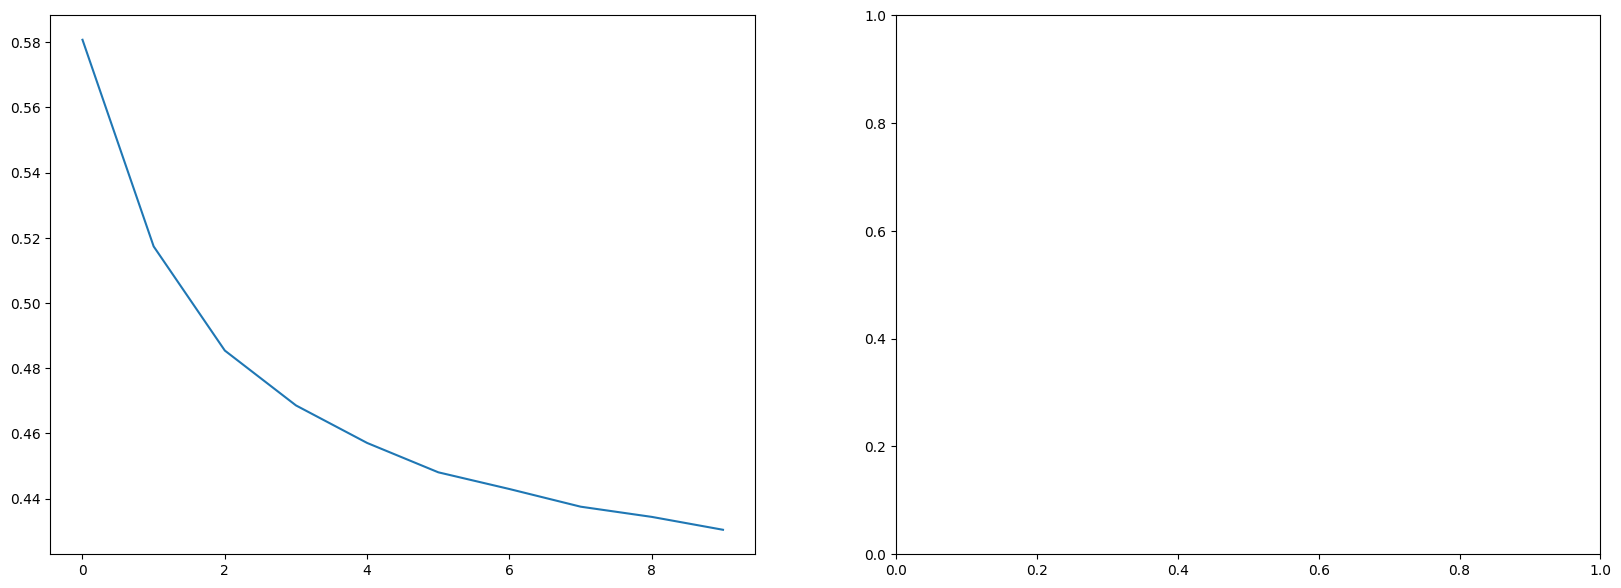

In [44]:
plot_history(history)

In [45]:
model.evaluate(X_test, y_test, verbose=0)

[0.5310944318771362, 0.7484923601150513]